A Taste of Neural Networks
==========================



In [1]:
import pandas as pd
import numpy as np
from pandasql import sqldf

q = lambda q: sqldf(q, globals())

data = pd.read_csv("source_data/datasets_26532_33799_super_hero_powers.csv")
data.columns= data.columns.str.lower().str.replace("[^a-zA-Z0-9]+","_")

data_tidy = pd.melt(data, id_vars=["hero_names"])
data_tidy

data.columns.values




/tmp/ipykernel_71/292050022.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns= data.columns.str.lower().str.replace("[^a-zA-Z0-9]+","_")


array(['hero_names', 'agility', 'accelerated_healing',
       'lantern_power_ring', 'dimensional_awareness', 'cold_resistance',
       'durability', 'stealth', 'energy_absorption', 'flight',
       'danger_sense', 'underwater_breathing', 'marksmanship',
       'weapons_master', 'power_augmentation', 'animal_attributes',
       'longevity', 'intelligence', 'super_strength', 'cryokinesis',
       'telepathy', 'energy_armor', 'energy_blasts', 'duplication',
       'size_changing', 'density_control', 'stamina', 'astral_travel',
       'audio_control', 'dexterity', 'omnitrix', 'super_speed',
       'possession', 'animal_oriented_powers', 'weapon_based_powers',
       'electrokinesis', 'darkforce_manipulation', 'death_touch',
       'teleportation', 'enhanced_senses', 'telekinesis', 'energy_beams',
       'magic', 'hyperkinesis', 'jump', 'clairvoyance',
       'dimensional_travel', 'power_sense', 'shapeshifting',
       'peak_human_condition', 'immortality', 'camouflage',
       'element_con

All right, first lets try to tidy up this data a little bit. We probably should eliminate very rare powers first.

In [2]:
data_tidy = q("select * from data_tidy");
power_percentages = q("select variable, sum(value*1.0)/sum(1.0) as percentage from data_tidy group by variable order by percentage desc")

useful_powers = q("select * from power_percentages where percentage > 0.1")
useful_powers

,variable,percentage
0,super_strength,0.539730
1,stamina,0.433283
2,durability,0.385307
3,super_speed,0.373313
4,agility,0.362819
5,flight,0.317841
6,accelerated_healing,0.266867
7,reflexes,0.245877
8,intelligence,0.236882
9,energy_blasts,0.220390


Now that we have a smaller list of common powers let's restrict our data set down to those powers alone.

In [46]:
power_columns = list(useful_powers['variable']);
restricted = data.filter(power_columns)
hero_name = data["hero_names"]
restricted = restricted.eval('hero_name = @hero_name')
restricted

,super_strength,stamina,durability,super_speed,agility,flight,accelerated_healing,reflexes,intelligence,energy_blasts,...,longevity,weapons_master,telepathy,enhanced_senses,force_fields,energy_absorption,teleportation,enhanced_hearing,immortality,hero_name
0,True,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3-D Man
1,True,True,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,A-Bomb
2,True,True,True,False,True,False,True,True,True,False,...,True,True,True,False,False,False,False,False,True,Abe Sapien
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Abin Sur
4,True,True,False,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,Abomination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,Yellowjacket II
663,True,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,Ymir
664,False,True,False,True,True,False,False,True,True,True,...,True,True,True,False,True,False,False,False,False,Yoda
665,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,Zatanna


Of course, now that we've removed a bunch of powers we should remove characters without any of these powers at all.

In [47]:
restricted['power_count'] = np.sum(restricted[useful_powers['variable']].values*1.0, axis=1)
restricted = q("select * from restricted where power_count > 0")
restricted

,super_strength,stamina,durability,super_speed,agility,flight,accelerated_healing,reflexes,intelligence,energy_blasts,...,weapons_master,telepathy,enhanced_senses,force_fields,energy_absorption,teleportation,enhanced_hearing,immortality,hero_name,power_count
0,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3-D Man,4.0
1,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,A-Bomb,5.0
2,1,1,1,0,1,0,1,1,1,0,...,1,1,0,0,0,0,0,1,Abe Sapien,12.0
3,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,Abomination,6.0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,Abraxas,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,Yellowjacket II,2.0
607,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Ymir,4.0
608,0,1,0,1,1,0,0,1,1,1,...,1,1,0,1,0,0,0,0,Yoda,12.0
609,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,Zatanna,1.0


Now, this is a good example of a data set where a standard euclidean distance isn't all that useful. For one thing, its a very high dimensional set at (n=24) and for another, the only variation along any dimension is 0 or 1. All points lie in the corners of a 24 dimensional cube and distances are highly quantized. There are a few things we can do here: 

1. Number of powers in common as a measure of similarity.
2. Some kind of dimensionality reduction method

The latter is complicated since most methods rely on a natural euclidean embedding which we do not have. Hence, today, we'll apply a neural network to the problem.

Steps:

1. Further Pre-treatment.
2. Design the Network (a simple auto-encoder)
3. Training 
4. Extract the features

Pre-treatment
=============

We need to turn our data into "activations" of some kind. In our case, the only required step is to convert these values to a matrix and make sure they have the right type.

In [48]:
training = restricted[useful_powers['variable']].values*1.0
training

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Now we need to design our network. We'll use Keras.

But First: History and Introduction to Neural Networks
======================================================

Aside
-----

GPU vs CPU

To get the best performance neural networks are usually trained on GPUs or even specially designed hardware. GPU = Graphics Processing Unit. GPUs are special purpose computer components for rendering graphics. They acheive their performance by exploiting the fact that many graphics rendering tasks are easy to parallize. Thus a GPU is just a lot (hundreds) of somewhat specialized processors on a single device which can be easily orchestrated to operate in parallel on rendering tasks. 

Since much of the work of training a neural network also can be parallelized, GPUs are useful for training networks as well.

CPUs these days typically have between 2 and 16 cores and so are also often parallel to a degree.

Return
------

Anyway, brains are fundamentally not even remotely serial. Each processor in a CPU or GPU is an enormous monolith of computational power compared to a neuron (although, on the other hand, an accurate simulation of the biophysics of a real neuron is probably a stretch on a single processor in real time). 

You have about 100 billion neurons, a figure which doesn't include the more numerous glial cells whose role in the computational action of the brain is still poorly understood. The brain is truly parallel. It might seem obvious that there is a central organization of some kind this hardly needs to be the case. Most of what goes on in the brain is entirely mediated by fundamentally local interactions.

Contemporary computers are not really up to the task of efficiently simulating such a system.

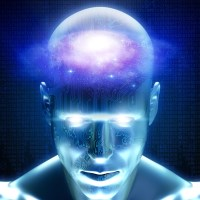

The Idea
--------

The idea, never the less, is easy enough to appreciate: A neural network is a collection of simple computation elements whose properties we adjust until a given transform is achieved.

The Biophysical Neuron
----------------------

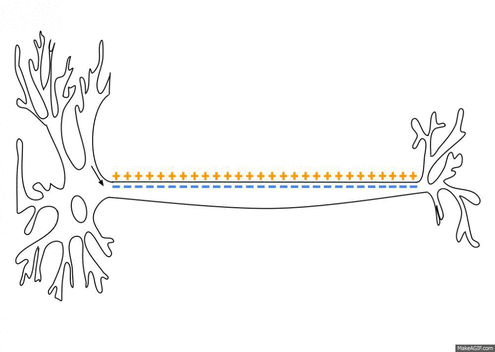

Most neurons have a similar anatomy, although in a real brain there is an absolutely shattering diversity of cells. Dendrites recieve connections from other neurons in the form of chemical messages which modify the way that ion channels in the cell wall operate - pumping in, out, opening or closing doors for, various ions. Thus, there is a charge difference across the cell wall of a neuron of something in the range (typically) of -70 mV. If enough gates open, the potential across the cell wall increases until a more or less deterministic set of voltage gated channels causes an "action potential" which propagates down the axon. Typically, the axon terminates at the dendrites of another neuron where a similar process is occuring.

The Perceptron
--------------

A perceptron is a very simple idealization of this process: a set of numerical inputs are multiplied by a weight and shifted by a bias. If this exceeds a threshold then the unit is "active", otherwise it is not. This last step simulates the nolinearity of the action potential mechanism. There is something tantalizing about the presence of a non-linearity since arguably "consciousness" always has a binary quality to it (either you are conscious of something or you are not). The nonlinearity in the way consciousness works even fooled Roger Penrose into thinking there was some relationship between brains and Quantum Mechanics (where the traditional understanding of the theory also features a prominent nonlinearity: wave function "collapse.").

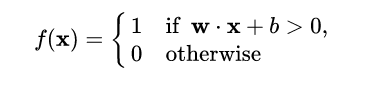

The Perceptron is a very limited computational object which cannot even manage to learn an XOR relation. On the other hand, its easy to train:

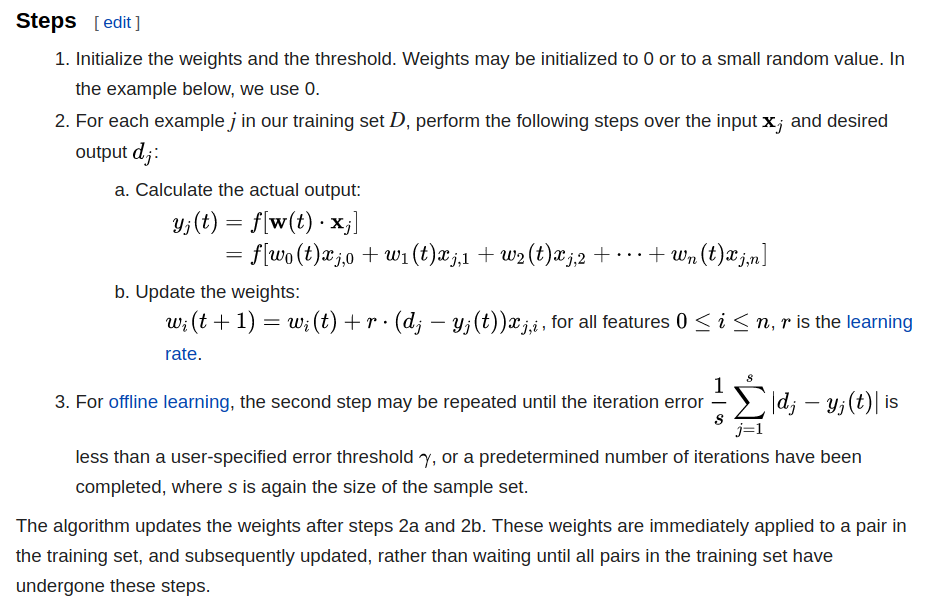

Several generalizations of the perceptron are easy to imagine:

1. More inputs and/or multiclass outputs
2. Non-linear activation functions around (w.x)
2. Lots of perceptrons all connected up in arbitrary ways.

(Activation function: a nonlinear relationship between the weighted inputs and the output of the neuron).

All this was obvious as a method of function approximation but training such networks was daunting for both methodological reasons and technical ones: computers not so fast in the past.

Backpropogation and Layered Networks
====================================

Training and neural network is an optimization problem. You specify an objective function like: "I want the vector of activations on the output of the network to be as close as possible in the sense of euclidean distance to some known example when a known input is applied" and then you try to find the set of weights which minimizes that objective.

Like any optimization problem, finding an approximate solution to this problem is "easy" if you can calculate the gradient of the parameter space with respect to the objective function. Luckily, as long as we restrict ourselves to differentiable activation functions we can calculate a gradient for the entire network. But this can be arbitrarily complex for an arbitrary neural network.

[Backpropogation](https://en.wikipedia.org/wiki/Backpropagation) is the recognition of serious improvements in efficiency by restricting ourselves to a laminar structure: that is, layers of neurons.

Thus, when we design neural networks with Keras or other frameworks we typically think in terms of "layers."

Deep Learning
=============

A combination of computing power absence of methodology prevented backpropogation from really cracking the neural network problem until the advent of so-called "Deep Learning." What precisely separates neural networks in general from "deep learning" is a little vague. The way I would put it is that deep learning came to mean the application of ever more powerful computers to networks with a variety of clever designs to make learning faster.

Fun fact: One of the grandfather's of deep learning, Yann LeCun, did his earliest work in this weird custom Lisp Dialect for statistical computing called LUSH. LUSH is sadly dead.

The key idea is that any task can be solved by an arbitrarily large number of all-to-all connected layers of neurons, but pruning those connections down is very inefficient. If you know something about the structure of the problem ahead of time (eg, that the visual field is such that you want to maintain the 2d structure up through the network) then you can build smaller networks which are faster to train.

Some Terms
==========

1. Autoencoder - we've seen this one before - a network which encodes and then decodes its inputs and thus learns an efficient representation thereof.
2. Convolutional Neural Network - a network which uses convolutions as a way of structuring its input layers to allow faster learning
3. Recurrant Neural Network - networks which can depend on time, roughly speaking - like the Long Short-Term Network. Activation on an input can depend on previous activations. Used for language models.
4. Regularization - constraints applied to a network or layer meant to reduce the chance of overfitting. Dropout layers are an example.

Ok, back to our problem.

The auto-encoder for dimensionality reduction
=============================================

Our data is such that we don't have a nice euclidean representation on which to perform analysis. We can use an auto-encoder to help us get there. The design of a typical auto-encoder is easy to understand:

![](https://upload.wikimedia.org/wikipedia/commons/3/37/Autoencoder_schema.png)
By Michela Massi - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=80177333

One slightly confusing element of this is that we want to access the inner layer at some point - those neurons' activations are our lower dimensional representation of our data. So we have to construct our network in pieces to make it easy to extract the data we want. So first we build the encoder. This goes from the input size down to the latent size.

In [49]:
native_size = training.shape[1]
latent_size = 2;
intermediate_size = int(native_size/2)
[native_size, intermediate_size, latent_size]

[22, 11, 2]

In [75]:
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Dense, LeakyReLU
from keras.layers import Dropout
from keras.models import Model


enc_input = Input(shape=native_size)
enc = LeakyReLU()(enc_input)
enc = Dense(units=intermediate_size, activation="relu")(enc)
enc = Dense(units=latent_size, activation="relu")(enc)

encoder = Model(enc_input, enc)
encoder.summary()


Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 22)]              0         
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 22)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 11)                253       
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 24        
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


The encoder itself is only useful to us when we've trained the entire network. Let's build the decoder. It doesn't have to be this way but the decoder can be more or less the inverse of the encoder.

In [76]:
dec_input = Input(shape=latent_size);
dec = LeakyReLU()(dec_input);
dec = Dense(units=intermediate_size, activation="relu")(dec)
dec = Dense(units=native_size, activation="sigmoid")(dec)

decoder = Model(dec_input, dec)
decoder.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 2)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 11)                33        
_________________________________________________________________
dense_23 (Dense)             (None, 22)                264       
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


Now we put them together into a full model.

In [77]:
autoencoder_input = Input(shape=native_size);
autoencoder_encoder = encoder(autoencoder_input);
autoencoder_decoder = decoder(autoencoder_encoder);

autoencoder = Model(autoencoder_input, autoencoder_decoder);

autoencoder.compile(optimizer="rmsprop", loss="mean_squared_error")
autoencoder.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 22)]              0         
_________________________________________________________________
model_15 (Functional)        (None, 2)                 277       
_________________________________________________________________
model_16 (Functional)        (None, 22)                297       
Total params: 574
Trainable params: 574
Non-trainable params: 0
_________________________________________________________________


In [78]:
autoencoder.fit(training, training, epochs = 500, verbose = False)

In [80]:
results = (autoencoder.predict(training) > 0.5)*1.0
results

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Not a very useful way of summarizing the results and the error also doesn't give us a great intuition. Let's see...

In [81]:
np.sum(training != results, axis=1)

array([ 2,  2,  7,  5,  7,  3,  2,  6,  1,  4,  2,  4,  3,  7,  3,  1,  6,
        1,  4,  2,  0,  1,  2,  3,  1,  3,  5,  3,  3,  1,  0,  2,  2,  0,
        3,  1,  2,  1,  2,  0,  2,  6,  2,  0,  1,  3,  3,  4,  6,  3,  2,
        2,  1,  3,  3,  3,  2,  2,  1,  3,  0,  3,  2,  5,  1,  5,  1,  1,
        2,  2,  1,  0,  0,  0,  9,  6,  4,  2,  2,  6,  5,  2,  2,  5,  1,
        3,  4,  1,  3,  0,  1,  2,  5,  1,  1,  1,  3,  1,  8,  2,  1,  4,
        2,  9,  1,  1,  9,  4,  2,  0,  0,  3,  6,  1,  2, 10,  4,  1,  4,
        3,  6,  4,  2,  2,  4,  4,  3,  8,  1,  0,  2,  2,  1,  1,  1,  3,
        2,  4,  5,  2,  1,  2,  2,  2,  1,  0,  2,  0,  2,  1,  3,  2,  2,
        3,  6,  3,  0,  1,  8,  0,  2,  5,  2,  3,  9,  2,  6,  6,  7,  6,
        1,  2,  2,  1,  3,  1,  2,  1,  3,  1,  7,  3,  1,  3,  3,  2,  2,
        3,  1,  4,  3,  5,  3,  2,  1,  6,  2,  2,  6,  0,  3,  6,  6,  2,
        4,  1,  5,  8,  3,  2,  4,  0,  2,  1,  1,  1,  7,  1,  5,  4,  3,
        1,  5,  1,  0,  3

The median number of incorrect power assignments here is just three. We know now to ask ourselves a variety of tough questions about whether this is the right way to characterize such a model but right now we're just playing around. Let's look at the so-called latent representation.

In [56]:
restricted

,super_strength,stamina,durability,super_speed,agility,flight,accelerated_healing,reflexes,intelligence,energy_blasts,...,weapons_master,telepathy,enhanced_senses,force_fields,energy_absorption,teleportation,enhanced_hearing,immortality,hero_name,power_count
0,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3-D Man,4.0
1,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,A-Bomb,5.0
2,1,1,1,0,1,0,1,1,1,0,...,1,1,0,0,0,0,0,1,Abe Sapien,12.0
3,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,Abomination,6.0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,Abraxas,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,Yellowjacket II,2.0
607,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Ymir,4.0
608,0,1,0,1,1,0,0,1,1,1,...,1,1,0,1,0,0,0,0,Yoda,12.0
609,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,Zatanna,1.0


In [82]:
import bokeh as bk
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource;
from ipywidgets import interact
from bokeh.io import output_notebook, show
from bokeh.models.tools import HoverTool

encoded = pd.DataFrame(encoder.predict(training),columns=["E1","E2"])

output_notebook();

restricted['E1'] = encoded['E1'];
restricted['E2'] = encoded['E2'];

source = ColumnDataSource(restricted);

tools="box_zoom, reset, box_select"

f = figure(plot_width=400, plot_height=400, tools = tools);
h = HoverTool();
h.tooltips = [('hero','@hero_name')]
f.add_tools(h)
f.circle('E1','E2',source=source);

show(f)

Loading BokehJS ...

This is suggestive but maybe we can improve this visualization somewhat by indexing everyone by their similarity to a common hero, say superman.

In [83]:
superman = q("select * from restricted where hero_name = 'Superman'")[power_columns].values
batman = q("select * from restricted where hero_name = 'Batman'")[power_columns].values
(superman, batman)

(array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0]]),
 array([[1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]))

We can calculate the "Supermanness" by counting the power overlap for each character. This is easier to do with numpy than in pandas or sql.

In [84]:
n_heroes = len(restricted.index)
n_powers = len(power_columns)
sm_rep = np.repeat(superman, n_heroes, axis=0)
bm_rep = np.repeat(batman, n_heroes, axis=0)
supermanness = np.sum(training == sm_rep,axis=1)/n_powers;
batmanness = np.sum(training == bm_rep, axis=1)/n_powers;

restricted['batmanness'] = batmanness;
restricted['supermanness'] = supermanness;


In [85]:
from bokeh.palettes import Blues256

def to_color(v):
    return Blues256[int(v*0.999999*len(Blues256))]

restricted['color'] = [to_color(v) for v in restricted['supermanness']]

source = ColumnDataSource(restricted)

f = figure(plot_width=400, plot_height=400, tools = tools);
h = HoverTool();
h.tooltips = [('hero','@hero_name')]
f.add_tools(h)
f.circle('E1','E2',source=source, color = 'color');

show(f)

In [86]:
restricted['color'] = [to_color(v) for v in restricted['batmanness']]

source = ColumnDataSource(restricted)

f = figure(plot_width=400, plot_height=400, tools = tools);
h = HoverTool();
h.tooltips = [('hero','@hero_name')]
f.add_tools(h)
f.circle('E1','E2',source=source, color = 'color');

show(f)

Oh well - we can at least see that our model isn't totally wild in its embedding.

Model Characterization, Validation, Overfitting
===============================================

In this toy example we aren't particularly concerned with whether our model is meaningful. But in reality we have to worry about model characterization as we would in any other situation.

In particular, we don't want our model to overfit, even if we are just using it to embed data. You can see why by considering what we are really after in this situation: we want to create 2d _map_ of the space of super heros but our neural network can pursue any strategy it likes.

An auto-encoder's job is to return the input as its output. And if you have enough degrees of freedom you can always partition the latent space into as many "boxes" as you have data points and then associate each box with a data point and just read that out with the decoder.

We don't want that - we want the space of the latent representation to be used efficiently. We want adjacency to mean something.  One way to push the network in that direction is to makes its job harder, by fuzzing the data on the input and demanding it still guess the correct output.

Strategies
==========

One way to do this is to generate errors in our input data:


In [66]:
y = np.repeat(training, 20, axis=0)
x = np.repeat(training, 20, axis=0)
## A ten percent chance that a power is toggled
x = np.mod(x + (np.random.ranf(x.shape) < 0.05)*1.0, 2)
x

array([[1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
autoencoder.reset_states()
autoencoder.fit(x, y, epochs=500, verbose=False)

In [68]:
encoded = pd.DataFrame(encoder.predict(training),columns=["E1","E2"])

output_notebook();

restricted['E1'] = encoded['E1'];
restricted['E2'] = encoded['E2'];

source = ColumnDataSource(restricted);

tools="box_zoom, reset, box_select"

f = figure(plot_width=400, plot_height=400, tools = tools);
h = HoverTool();
h.tooltips = [('hero','@hero_name')]
f.add_tools(h)
f.circle('E1','E2',source=source, color = 'color');

show(f)

Loading BokehJS ...

A cursory inspection of the above suggests this is better - it also looks a little bit more like a principal componenet analysis, which is sort of what we expect to be the case.

But short of generating fuzzed data as we've done before, can we solve this problem another way?

There are some in-situ methods that accomplish a similar outcome.

Dropout Layers
==============

Keras includes the idea of a "Dropout" layer which simply censors neurons from the previous layer randomly. This has a similar effect to the use of fuzzed data in the above example. We need to modify our network a little bit.

In [70]:
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Dense, LeakyReLU
from keras.layers import Dropout
from keras.models import Model


def build_dropout_model():
    enc_input = Input(shape=native_size)
    enc = LeakyReLU()(enc_input)
    enc = Dropout(rate=0.1)(enc);
    enc = Dense(units=intermediate_size, activation="relu")(enc)
    enc = Dense(units=latent_size, activation="relu")(enc)

    encoder = Model(enc_input, enc)
    encoder.summary()

    # I've chosen not to include a dropout layer in the decoder, note
    dec_input = Input(shape=latent_size);
    dec = LeakyReLU()(dec_input);
    dec = Dense(units=intermediate_size, activation="relu")(dec)
    dec = Dense(units=native_size, activation="sigmoid")(dec)

    decoder = Model(dec_input, dec)
    decoder.summary()

    autoencoder_input = Input(shape=native_size);
    autoencoder_encoder = encoder(autoencoder_input);
    autoencoder_decoder = decoder(autoencoder_encoder);

    autoencoder = Model(autoencoder_input, autoencoder_decoder);

    autoencoder.compile(optimizer="rmsprop", loss="mean_squared_error")
    
    return (autoencoder, encoder, decoder)

do_ae, do_en, do_de = build_dropout_model()

do_ae.fit(training, training, epochs=500, verbose=False)

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 22)]              0         
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 22)                0         
_________________________________________________________________
dropout (Dropout)            (None, 22)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 11)                253       
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 24        
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape  

In [71]:
encoded = pd.DataFrame(do_en.predict(training),columns=["E1","E2"])

output_notebook();

restricted['E1'] = encoded['E1'];
restricted['E2'] = encoded['E2'];

source = ColumnDataSource(restricted);

tools="box_zoom, reset, box_select"

f = figure(plot_width=400, plot_height=400, tools = tools);
h = HoverTool();
h.tooltips = [('hero','@hero_name')]
f.add_tools(h)
f.circle('E1','E2',source=source, color = 'color');

show(f)

Loading BokehJS ...

Dropout regularization is simple, computationally cheap and easy to understand. There are other strategies that involve imposting penalties on the total activation of layers. I don't know all that much about how to apply these intuitively, but let's give it a shot:

In [72]:


from keras.constraints import max_norm
# max norm imposes a contstraint on the maximum activation of neurons in the layer.

def build_max_norm_model():
    enc_input = Input(shape=native_size)
    enc = LeakyReLU()(enc_input)
    enc = Dense(units=intermediate_size, activation="relu", kernel_constraint=max_norm(3), bias_constraint=max_norm(3))(enc)
    enc = Dense(units=latent_size, activation="relu")(enc)

    encoder = Model(enc_input, enc)
    encoder.summary()

    # I've chosen not to include a dropout layer in the decoder, note
    dec_input = Input(shape=latent_size);
    dec = LeakyReLU()(dec_input);
    dec = Dense(units=intermediate_size, activation="relu")(dec)
    dec = Dense(units=native_size, activation="relu")(dec)

    decoder = Model(dec_input, dec)
    decoder.summary()

    autoencoder_input = Input(shape=native_size);
    autoencoder_encoder = encoder(autoencoder_input);
    autoencoder_decoder = decoder(autoencoder_encoder);

    autoencoder = Model(autoencoder_input, autoencoder_decoder);

    autoencoder.compile(optimizer="rmsprop", loss="mean_squared_error")
    
    return (autoencoder, encoder, decoder)

mn_ae, mn_en, mn_de = build_max_norm_model()

mn_ae.fit(training, training, epochs=500, verbose=False)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 22)]              0         
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 22)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 11)                253       
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 24        
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 2)]               0         
__________________________________________

In [73]:
encoded = pd.DataFrame(mn_en.predict(training),columns=["E1","E2"])

output_notebook();

restricted['E1'] = encoded['E1'];
restricted['E2'] = encoded['E2'];

source = ColumnDataSource(restricted);

tools="box_zoom, reset, box_select"

f = figure(plot_width=400, plot_height=400, tools = tools);
h = HoverTool();
h.tooltips = [('hero','@hero_name')]
f.add_tools(h)
f.circle('E1','E2',source=source, color = 'color');

show(f)

Loading BokehJS ...

Just to put the bee in your bonnet - this is LASSO and Ridge Regression. We're adding a penalty to the network which forces it to choose to use fewer of its degrees of freedom.

I think the right way to appreciate this idea is that we give the model more knobs to turn but restrict now they can be tuned. This might help the model avoid local minima that would be difficult to escape from in a model with fewer degrees of freedom.

Recap
=====

Neural networks are biophysically inspired amalgams of small computational units which sum their inputs and pass the result through a non-linearity. 

Starting in the late 80s people figured out efficient ways to train deep networks using faster computers and back propagation, an algorithm which gains efficiency by imposing laminar structures on neural networks.

In the end, a neural network is just a function approximator which can be made to do all sorts of things. In this lecture we used keras to build an auto-encoder to do dimensionality reduction.

We also experimented with regularizing our model too.

This really is just scratching the surface of neural networks, but hopefully you feel comfortable enough to jump in.  A nice thing to try is classification - in that case the output of the network is just the class. A single neuron can be used for a yes/no classifier but you might need multiple neurons on the output layer for a multi-class predictor. 

That is it!

Grades for the project should be out by the end of the week!